In [11]:
# Importamos las librerías que utilizaremos, numpy para introducir los datos, la función curve_fit para estimar parámetros
# y matplotlib para graficar.

import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [12]:
# Introducimos los datos en arreglos de numpy. 
años = np.array([0, 1, 2, 3, 4, 5, 6, 6.5 ])  #unidades de t en la que cada unidad representa 10 años reales.
poblacion = np.array([25.8, 34.9, 48.2, 66.8, 81.2, 97.5, 112.3, 119.5])  # población en millones

In [13]:
# Introducimos la función logistica en una función de python, en donde:
    #t: tiempo
    #K(mayuscula): capacidad de carga
    #C: Constante arbitraria
    #k(minuscula): tasa de crecimiento

def logistic(t, K, C, k):
    return K / (1 + C * np.exp(-(k*t)))

In [14]:
# Dadas las instrucciones del ejercicio, separamos los 3 datos de 3 diferentes años (1950,1980 y 2015) y con base
# en ellos, buscaremos los parámetros de K, C y k que se ajustan a la curva.

años_ajuste = años[[0, 3, 7]]
poblacion_ajuste = poblacion[[0, 3, 7]]

In [15]:
# Utilizamos la funcion curve_fit para optimizar la curva de la función, y agregando una estimación inicial basada en información
# de la CONAPO, estimando el máximo poblacional de México en 2050 (K) en 148.2 millones de personas.

popt, pcov = curve_fit(logistic, años_ajuste, poblacion_ajuste, p0=[148.2,0.4,1])
K, C, k = popt


# Imprimimos los valores de K, C y k.
print(K)
print(C)
print(k)



150.4913880018334
4.832999534954783
0.4500114320791214


/var/folders/b_/3cl03bzs3454_15p63xsh4fh0000gp/T/ipykernel_45658/2032351043.py:4: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(logistic, años_ajuste, poblacion_ajuste, p0=[148.2,0.4,1])


In [16]:
# Con ayuda de numpy, generamos los nuevos datos para la gráfica.

años_nuevos = np.linspace(0, 10, 100)
poblacion_estimada = logistic(años_nuevos, K, C, k)

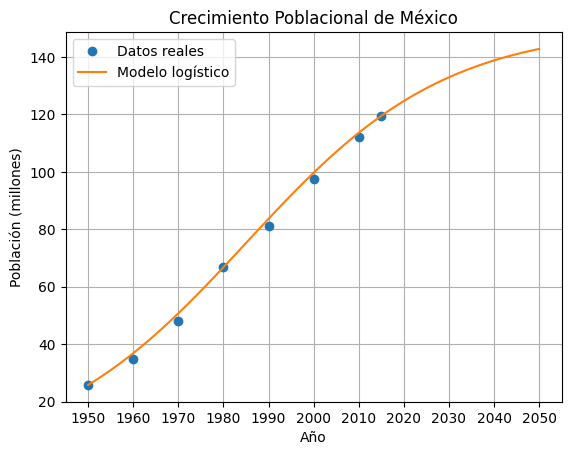

Capacidad de carga estimada (K): 150.4913880018334
Tasa de crecimiento intrínseca (k): 0.4500114320791214


In [17]:
# Graficamos los resultados.

plt.plot(años, poblacion, 'o', label='Datos reales')
plt.plot(años_nuevos, poblacion_estimada, '-', label='Modelo logístico')
plt.xticks([0, 1, 2, 3, 4, 5, 6 , 7, 8, 9, 10], ['1950', '1960', '1970', '1980', '1990', '2000', '2010','2020', '2030', '2040', '2050'])
plt.xlabel('Año')
plt.ylabel('Población (millones)')
plt.title('Crecimiento Poblacional de México')
plt.legend()
plt.grid(True)
plt.show()

print("Capacidad de carga estimada (K):", K)
print("Tasa de crecimiento intrínseca (k):", k)

In [ ]:
# Utilizamos la función logistic para imprimir los datos estimados para realizar la tabla comparativa. 
print(logistic(0, K, C, k))
print(logistic(1, K, C, k))
print(logistic(2, K, C, k))
print(logistic(3, K, C, k))
print(logistic(4, K, C, k))
print(logistic(5, K, C, k))
print(logistic(6, K, C, k))
print(logistic(6.5, K, C, k))